# SVM 예제

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.svm import SVC, LinearSVC

In [2]:
X = np.array([[-1, -1], [-2, -1], [1, 1], [2, 1]])
y = np.array([1, 1, 2, 2])

scaler = StandardScaler()
X = scaler.fit_transform(X)

svm_classifier = SVC(gamma='auto')
svm_classifier.fit(X, y)

SVC(gamma='auto')

In [3]:
X

array([[-0.63245553, -1.        ],
       [-1.26491106, -1.        ],
       [ 0.63245553,  1.        ],
       [ 1.26491106,  1.        ]])

In [4]:
x_pts = np.array([-1, -2, 1, 2])
y_pts = np.array([-1, -1, 1, 1])
label = y

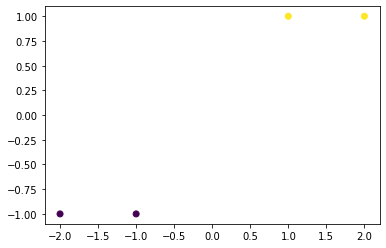

In [5]:
plt.scatter(x_pts, y_pts, c=label)

In [6]:
svm_classifier.predict(np.array([-1, 0]).reshape(1, -1))

array([1])

In [7]:
svm_classifier.predict(np.array([1, 0.5]).reshape(1, -1))

array([2])

In [8]:
svm_classifier.predict(scaler.transform(np.array([-1, 0]).reshape(1, -1)))

array([1])

In [9]:
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

# svm_classifier = SVC(gamma='auto')
# svm_classifier.fit(X, y)

pipeline = make_pipeline(StandardScaler(), SVC(gamma='auto'))
pipeline.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [10]:
pipeline.predict(np.array([-1, 0]).reshape(1, -1))

array([1])

In [11]:
pipeline.predict(np.array([1, 0.5]).reshape(1, -1))

array([2])

In [12]:
# 가우시안 분포로 점들을 랜덤하게 생성, center 수 조정
X, y = make_blobs(n_samples=40, centers=2, random_state=0)

In [13]:
X

array([[ 0.62835793,  4.4601363 ],
       [ 0.89011768,  1.79849015],
       [ 3.19466821, -0.33716216],
       [ 3.2460247 ,  2.84942165],
       [ 2.50904929,  5.7731461 ],
       [ 1.74371499,  0.953829  ],
       [-0.07228289,  2.88376939],
       [ 1.54561534,  0.45958936],
       [ 0.58894326,  4.00148458],
       [ 1.28933778,  3.44969159],
       [ 1.42013331,  4.63746165],
       [ 2.47034915,  4.09862906],
       [ 1.84070628,  3.56162231],
       [ 1.24212124, -0.82861894],
       [ 1.54446238, -0.28296852],
       [ 2.78435808,  1.02664657],
       [ 2.84382807,  3.32650945],
       [ 2.52092996, -0.63858003],
       [ 1.9263585 ,  4.15243012],
       [-0.73000011,  6.25456272],
       [ 1.15980096,  1.28456616],
       [ 2.45760916,  0.21285357],
       [ 0.80247216,  1.67515402],
       [ 2.20656076,  5.50616718],
       [ 2.23269366,  0.49588272],
       [ 1.42094543,  0.53492249],
       [ 2.02708529,  1.32599553],
       [ 0.42506917,  1.36044592],
       [ 0.44136967,

In [14]:
y

array([0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0])

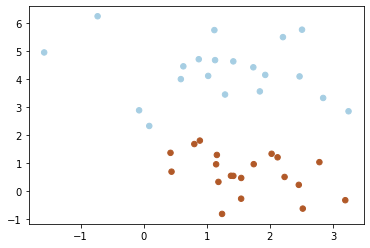

In [15]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

In [16]:
X[:, 0]

array([ 0.62835793,  0.89011768,  3.19466821,  3.2460247 ,  2.50904929,
        1.74371499, -0.07228289,  1.54561534,  0.58894326,  1.28933778,
        1.42013331,  2.47034915,  1.84070628,  1.24212124,  1.54446238,
        2.78435808,  2.84382807,  2.52092996,  1.9263585 , -0.73000011,
        1.15980096,  2.45760916,  0.80247216,  2.20656076,  2.23269366,
        1.42094543,  2.02708529,  0.42506917,  0.44136967,  1.38280707,
        1.0220286 ,  1.1312175 ,  1.18447037,  1.7373078 ,  1.14796916,
        0.08848433,  1.12031365,  0.87305123,  2.12178474, -1.57671974])

In [17]:
X[:, 1]

array([ 4.4601363 ,  1.79849015, -0.33716216,  2.84942165,  5.7731461 ,
        0.953829  ,  2.88376939,  0.45958936,  4.00148458,  3.44969159,
        4.63746165,  4.09862906,  3.56162231, -0.82861894, -0.28296852,
        1.02664657,  3.32650945, -0.63858003,  4.15243012,  6.25456272,
        1.28456616,  0.21285357,  1.67515402,  5.50616718,  0.49588272,
        0.53492249,  1.32599553,  1.36044592,  0.68492338,  0.5381105 ,
        4.11660348,  4.68194985,  0.318814  ,  4.42546234,  0.94960906,
        2.32299086,  5.75806083,  4.71438583,  1.20013556,  4.95740592])

In [18]:
clf = LinearSVC().fit(X, y)

In [19]:
decision_function = clf.decision_function(X) # 결정 함수 = np.dot(X, clf.coef_[0]) + clf.intercept_[0]
support_vector_indices = np.where(
    np.abs(decision_function) <= 1 + 1e-15)[0] # 크기가 일반적으로 1로 제한되는 경계
support_vectors = X[support_vector_indices]
support_vectors

array([[ 0.89011768,  1.79849015],
       [ 3.2460247 ,  2.84942165],
       [-0.07228289,  2.88376939],
       [ 2.84382807,  3.32650945],
       [ 1.15980096,  1.28456616],
       [ 0.80247216,  1.67515402],
       [ 2.02708529,  1.32599553],
       [ 0.42506917,  1.36044592],
       [ 0.08848433,  2.32299086],
       [ 2.12178474,  1.20013556]])

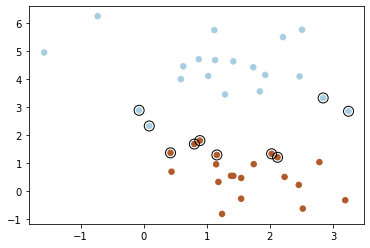

In [20]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100, # s는 크기, facecolor는 채우기, edgecolor 테두리
                linewidth=1, facecolors='none', edgecolors='k')

C is 1
xlim, ylim
(-1.817856959278668, 3.487161924525187) (-1.182778025647436, 6.608721805933875)
--------------------------------------------------
result of linespace
[-1.81785696 -1.70959127 -1.60132558 -1.49305988 -1.38479419 -1.2765285
 -1.16826281 -1.05999712 -0.95173143 -0.84346574 -0.73520004 -0.62693435
 -0.51866866 -0.41040297 -0.30213728 -0.19387159 -0.0856059   0.0226598
  0.13092549  0.23919118  0.34745687  0.45572256  0.56398825  0.67225395
  0.78051964  0.88878533  0.99705102  1.10531671  1.2135824   1.32184809
  1.43011379  1.53837948  1.64664517  1.75491086  1.86317655  1.97144224
  2.07970793  2.18797363  2.29623932  2.40450501  2.5127707   2.62103639
  2.72930208  2.83756778  2.94583347  3.05409916  3.16236485  3.27063054
  3.37889623  3.48716192]
--------------------------------------------------
result of meshgrid
[[-1.81785696 -1.70959127 -1.60132558 ...  3.27063054  3.37889623
   3.48716192]
 [-1.81785696 -1.70959127 -1.60132558 ...  3.27063054  3.37889623
   3.4

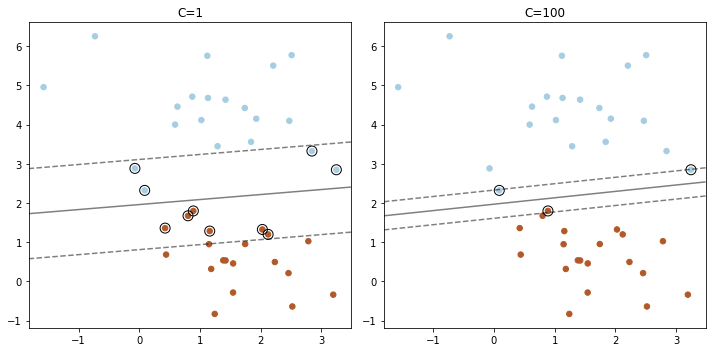

In [21]:
plt.figure(figsize=(10, 5))
for i, C in enumerate([1, 100]):
    print('C is', C)
    clf = LinearSVC(C=C,random_state=42).fit(X, y)
    decision_function = clf.decision_function(X)
    support_vector_indices = np.where(
        np.abs(decision_function) <= 1 + 1e-15)[0]
    support_vectors = X[support_vector_indices]

    plt.subplot(1, 2, i + 1)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired) # 입력 데이터
    ax = plt.gca()
    xlim = ax.get_xlim() #x 축의 lim
    ylim = ax.get_ylim() #y 축의 lim
    print('xlim, ylim')
    print(xlim, ylim)
    print('-'*50)
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), # meshgrid는 격자를 만들어주는 것 coordinate vectors -> coordinate matrix
                         np.linspace(ylim[0], ylim[1], 50))
    print('result of linespace')
    print(np.linspace(xlim[0], xlim[1], 50)) # 1차원 배열 만들기 ~에서 ~까지, ~개로
    print('-'*50)
    print('result of meshgrid')
    print(xx, yy) 
    print('-'*50)
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    print('shape of Z, xx')
    print(Z.shape)
    print(xx.shape)
    Z = Z.reshape(xx.shape)
    # plt.contour(xx, yy, Z, colors='k', alpha=0.5,
    #            linestyles=['--', '-', '--'])
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100, # support vector
                linewidth=1, facecolors='none', edgecolors='k')
    plt.title("C=" + str(C))
    print('='*50)
plt.tight_layout()
plt.show()

In [22]:
np.linspace(1,3,3)

array([1., 2., 3.])

In [23]:
np.linspace(4,6,3)

array([4., 5., 6.])

In [24]:
a = np.meshgrid([1,2,3] ,[4,5,6])
a

[array([[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]]),
 array([[4, 4, 4],
        [5, 5, 5],
        [6, 6, 6]])]

In [25]:
a[0]

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])

In [26]:
a[1]

array([[4, 4, 4],
       [5, 5, 5],
       [6, 6, 6]])

In [27]:
np.meshgrid(np.linspace(1,3,3), np.linspace(4,6,3))

[array([[1., 2., 3.],
        [1., 2., 3.],
        [1., 2., 3.]]),
 array([[4., 4., 4.],
        [5., 5., 5.],
        [6., 6., 6.]])]

In [28]:
a = np.array([[0,1],
               [2,3]])

In [29]:
a.shape

(2, 2)

In [30]:
a1 = a.ravel()
a1

array([0, 1, 2, 3])

In [31]:
a2 = a.reshape(-1)
a2

array([0, 1, 2, 3])

In [32]:
a3 = a.flatten()
a3

array([0, 1, 2, 3])

In [33]:
a[0][0] = -1

In [34]:
print(a)
print(a1) # 복사 X -> 원본에 영향
print(a2) # 복사 X -> 원본에 영향
print(a3) # 복사 O -> 원본에 영향 X

[[-1  1]
 [ 2  3]]
[-1  1  2  3]
[-1  1  2  3]
[0 1 2 3]


In [35]:
a1[-1] = -4

In [36]:
print(a)
print(a1) # 복사 X -> 원본에 영향
print(a2) # 복사 X -> 원본에 영향
print(a3) # 복사 O -> 원본에 영향 X

[[-1  1]
 [ 2 -4]]
[-1  1  2 -4]
[-1  1  2 -4]
[0 1 2 3]


In [37]:
a = np.linspace(1,3,3)
b = np.linspace(4,6,3)

In [38]:
c1 = np.c_[a, b]
print(c1)
c2 = np.column_stack([a, b]) #vstack 이나 hstack과는 또 다른!
print(c2)

[[1. 4.]
 [2. 5.]
 [3. 6.]]
[[1. 4.]
 [2. 5.]
 [3. 6.]]


In [39]:
names = ['a', 'b', 'c']

for i, name in enumerate(names):
  print(i, name)

0 a
1 b
2 c


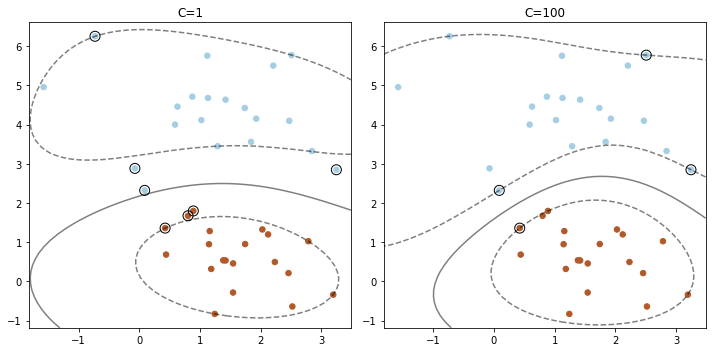

In [40]:
plt.figure(figsize=(10, 5))
for i, C in enumerate([1, 100]):
    clf = SVC(C=C,random_state=42).fit(X, y) # linear -> svm + rbf
    decision_function = clf.decision_function(X)
    support_vector_indices = np.where(
        np.abs(decision_function) <= 1 + 1e-15)[0]
    support_vectors = X[support_vector_indices]

    plt.subplot(1, 2, i + 1)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired) 
    ax = plt.gca()
    xlim = ax.get_xlim() 
    ylim = ax.get_ylim() 
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100, # support vector
                linewidth=1, facecolors='none', edgecolors='k')
    plt.title("C=" + str(C))
plt.tight_layout()
plt.show()

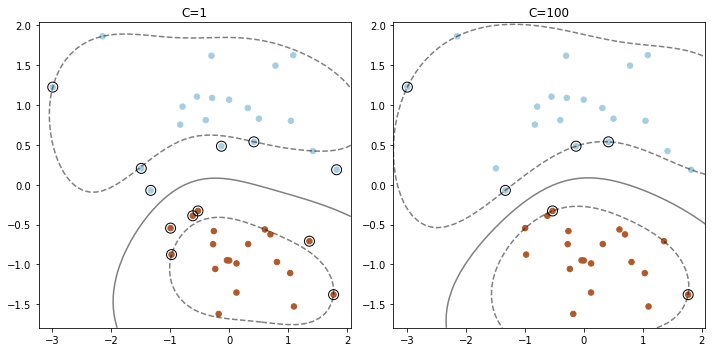

In [41]:
plt.figure(figsize=(10, 5))
for i, C in enumerate([1, 100]):
    X = StandardScaler().fit_transform(X) # scaler 추가
    clf = SVC(C=C,random_state=42).fit(X, y)
    decision_function = clf.decision_function(X)
    support_vector_indices = np.where(
        np.abs(decision_function) <= 1 + 1e-15)[0]
    support_vectors = X[support_vector_indices]

    plt.subplot(1, 2, i + 1)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired) 
    ax = plt.gca()
    xlim = ax.get_xlim() 
    ylim = ax.get_ylim() 
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100, # support vector
                linewidth=1, facecolors='none', edgecolors='k')
    plt.title("C=" + str(C))
plt.tight_layout()
plt.show()

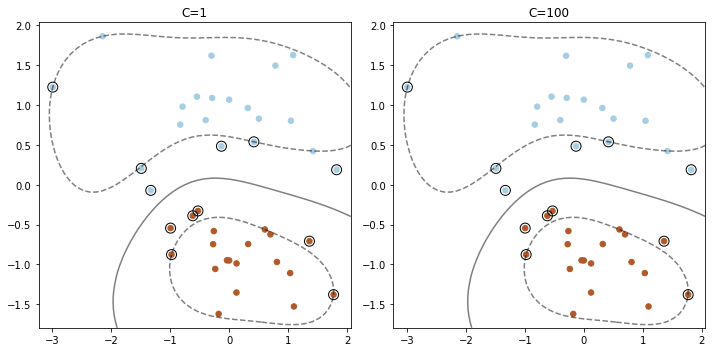

In [42]:
plt.figure(figsize=(10, 5))
for i, C in enumerate([1, 100]):
    #X = StandardScaler().fit_transform(X)
    #clf = SVC(C=C,random_state=42).fit(X, y)
    clf = make_pipeline(StandardScaler(), SVC(gamma='auto')).fit(X, y) # pipeline으로 묶기
    decision_function = clf.decision_function(X)
    support_vector_indices = np.where(
        np.abs(decision_function) <= 1 + 1e-15)[0]
    support_vectors = X[support_vector_indices]

    plt.subplot(1, 2, i + 1)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired) 
    ax = plt.gca()
    xlim = ax.get_xlim() 
    ylim = ax.get_ylim() 
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100, # support vector
                linewidth=1, facecolors='none', edgecolors='k')
    plt.title("C=" + str(C))
plt.tight_layout()
plt.show()